# Libraries

In [1]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models

In [2]:
from utils import get_train_val_test_loader, train_and_evaluate, test_model, device, plot_figure, train_and_evaluate_triple, get_embeddings_and_labels, test_model_triplet

# LOADING DATA

In [3]:
train_loader, validation_loader, test_loader = get_train_val_test_loader()

TRAINING SIZE: 816
VALIDATION SIZE: 204
TRAINING SIZE: 6149


# Initialize model

In [4]:
model = models.resnet18(weights="DEFAULT")
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 102)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train and validate

In [5]:
epochs = 2
train_losses, train_accuracies, validation_losses, validation_accuracies = train_and_evaluate(model, train_loader, validation_loader, criterion, optimizer, num_epochs=epochs)

Epoch 1/2, Train Loss: 3.7001, Train Acc: 0.2390, Val Loss: 5.4987, Val Acc: 0.1373
Epoch 2/2, Train Loss: 1.5913, Train Acc: 0.6483, Val Loss: 2.4529, Val Acc: 0.4216


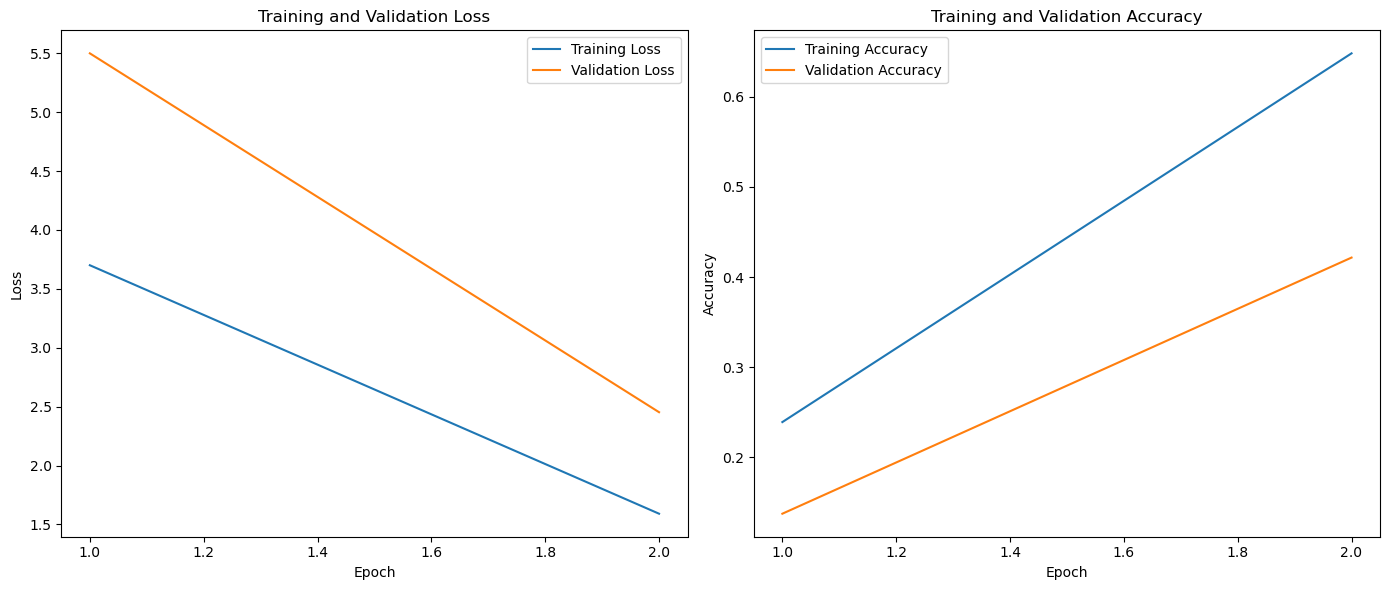

In [6]:
plot_figure([num + 1 for num in range(epochs)], train_losses, train_accuracies, validation_losses, validation_accuracies)

In [7]:
test_model(model, test_loader, criterion)

START TESTING
Test Loss: 2.4360, Test Accuracy: 0.4280


# TRIPLET

In [4]:
train_loader_triplet, validation_loader_triplet, test_loader_triplet = get_train_val_test_loader(triplet = True)

TRAINING SIZE: 816
VALIDATION SIZE: 204
TRAINING SIZE: 6149


In [5]:
model = models.resnet18(weights="DEFAULT")
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 102)
model.to(device)
criterion = nn.TripletMarginLoss(margin=1.0, p=2)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
epochs = 2
train_losses, validation_losses = train_and_evaluate_triple(model, train_loader_triplet, validation_loader_triplet, criterion, optimizer, num_epochs=epochs)

START TRAINING
Epoch 1/2, Train Loss: 0.7210, Val Loss: 1.1994
Epoch 2/2, Train Loss: 0.6440, Val Loss: 1.7350


In [7]:
embeddings_train, labels_train = get_embeddings_and_labels(model, train_loader)
embeddings_test, labels_test = get_embeddings_and_labels(model, test_loader)

test_model_triplet(embeddings_train.to(device).numpy() , labels_train.to(device).numpy(), embeddings_test.to(device).numpy() , labels_test.to(device).numpy())

Test Accuracy: 0.1774


0.17742722393885185